In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.cluster import DBSCAN
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report , f1_score ,recall_score , precision_score,accuracy_score ,confusion_matrix ,roc_curve, auc, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.tree import DecisionTreeClassifier
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential

In [2]:
hyper = pd.read_csv('femalepre2.csv').drop('id',axis=1)

print(hyper.head())
print("dimension of Hypertension data: {}".format(hyper.shape))
X=hyper.drop('hyper',axis=1)
y= hyper['hyper']

   Age  Obese    bmi  wc   hc  whr     SBP    DBP  hyper
0   31      0  28.76  88  101   87  128.00  74.33      0
1   21      0  27.59  86  110   78  123.33  70.00      0
2   23      0  22.45  72  104   69   90.00  56.67      1
3   24      0  28.16  89  108   82  126.67  90.00      0
4   20      0  25.05  81  108   75  120.00  69.00      1
dimension of Hypertension data: (224, 9)


In [3]:
print(hyper.groupby('hyper').size())

hyper
0     95
1    129
dtype: int64


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


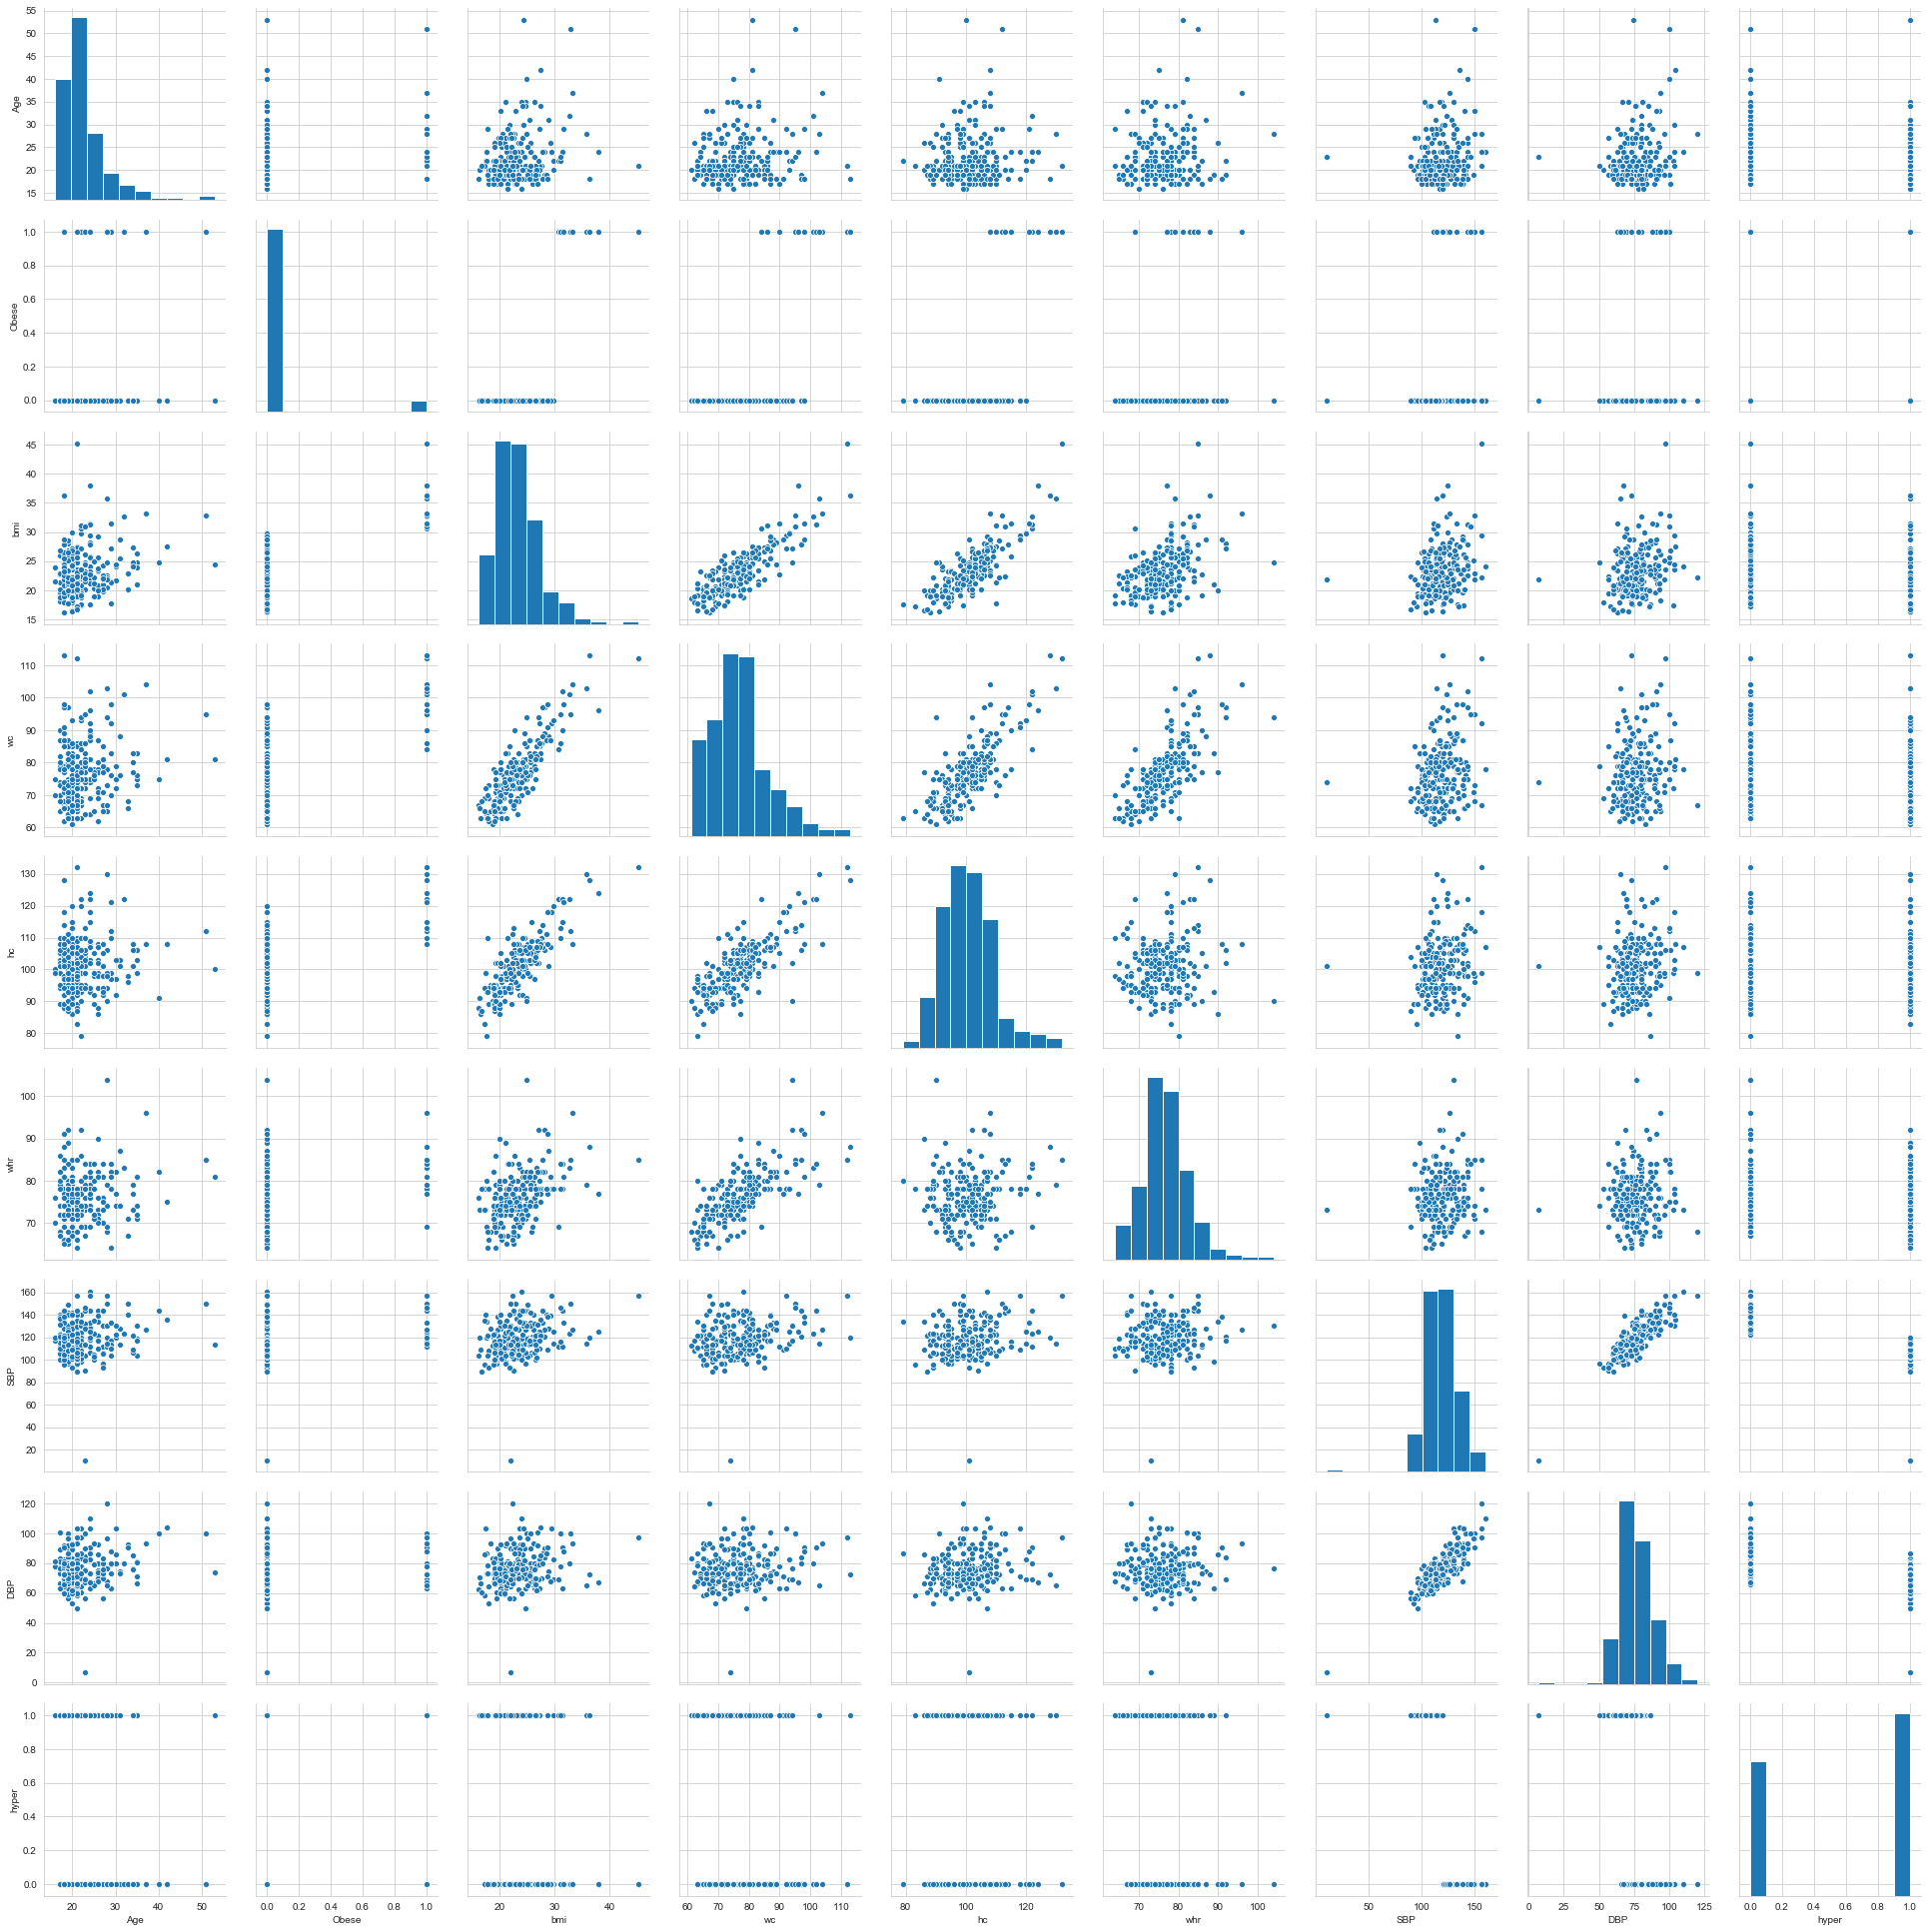

In [5]:
import seaborn as sns
sns.set_style("whitegrid")
sns.pairplot(hyper,size=3)

In [5]:
LR= LogisticRegression()
KNN= KNeighborsClassifier(n_neighbors=7)
CART= DecisionTreeClassifier()
NB= GaussianNB(priors=None, var_smoothing=5.5)
SVM= SVC(random_state=42)
MLP=MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=20,random_state=1)
DT=DecisionTreeClassifier()
RF=RandomForestClassifier(n_estimators=50, random_state=42, n_jobs=-1)

In [8]:
import tensorflow as tf
cnn = tf.keras.models.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_dim=8),
    tf.keras.layers.Dense(10)
])

cnn.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            metrics=['accuracy'])

cnn.summary()

cnn.fit(X, y, epochs=150, batch_size=5)

_, accuracy = cnn.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 10)                90        
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 200
Trainable params: 200
Non-trainable params: 0
_________________________________________________________________
Train on 224 samples
Epoch 1/150
224/224 [==============================] - 0s 1ms/sample - loss: 7.3380 - accuracy: 0.4643
Epoch 2/150
224/224 [==============================] - 0s 294us/sample - loss: 0.5441 - accuracy: 0.8125
Epoch 3/150
224/224 [==============================] - 0s 334us/sample - loss: 0.5136 - accuracy: 0.8482
Epoch 4/150
224/224 [==============================] - 0s 280us/sample - loss: 0.4681 - accuracy: 0.8304
Epoch 5/150
224/224 [==============================] - 0s 289us/sample - loss: 

Epoch 146/150
224/224 [==============================] - 0s 329us/sample - loss: 0.1758 - accuracy: 0.9286
Epoch 147/150
224/224 [==============================] - 0s 312us/sample - loss: 0.1708 - accuracy: 0.9196
Epoch 148/150
224/224 [==============================] - 0s 329us/sample - loss: 0.1759 - accuracy: 0.9241
Epoch 149/150
224/224 [==============================] - 0s 329us/sample - loss: 0.1751 - accuracy: 0.9196
Epoch 150/150
224/224 [==============================] - 0s 129us/sample - loss: 0.1358 - accuracy: 0.9420
Accuracy: 94.20


In [9]:
# evaluate the model
_, train_acc = cnn.evaluate(X_train2,y_train2 , verbose=0)
print('train',train_acc)
_, test_acc = cnn.evaluate(X_test2, y_test2, verbose=0)
print('test',test_acc)

NameError: name 'X_train2' is not defined

In [46]:
y_pred = cnn.predict(X_test2, batch_size=5)
y_pred_bool = np.argmax(y_pred, axis=1)
fpr, tpr, thresholds = metrics.roc_curve(y, y_pred_bool, pos_label=2)
metrics.auc(fpr, tpr)
print(classification_report(y_test2, y_pred_bool))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89         5
           1       1.00      1.00      1.00         4
           2       0.95      1.00      0.98        21

    accuracy                           0.97        30
   macro avg       0.98      0.93      0.96        30
weighted avg       0.97      0.97      0.97        30



# feature selection 

In [13]:
sfs=SFS(RF,k_features =4,forward=True,floating=False,scoring='accuracy',verbose=2,cv =4,n_jobs= -1)
sfs.fit(X,y)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of   8 | elapsed:    8.0s remaining:    2.6s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    8.2s finished

[2020-02-23 23:55:38] Features: 1/4 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of   7 | elapsed:    1.2s remaining:    0.9s
[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    2.4s finished

[2020-02-23 23:55:40] Features: 2/4 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:    1.2s remaining:    1.2s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    2.3s finished

[2020-02-23 23:55:43] Features: 3/4 -- score: 1.0[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    2.2s finished

[2020-02-23 23:55:

SequentialFeatureSelector(clone_estimator=True, cv=4,
                          estimator=RandomForestClassifier(bootstrap=True,
                                                           class_weight=None,
                                                           criterion='gini',
                                                           max_depth=None,
                                                           max_features='auto',
                                                           max_leaf_nodes=None,
                                                           min_impurity_decrease=0.0,
                                                           min_impurity_split=None,
                                                           min_samples_leaf=1,
                                                           min_samples_split=2,
                                                           min_weight_fraction_leaf=0.0,
                                                           n_es

In [11]:
print(sfs.k_feature_idx_)
print(sfs.k_feature_names_)
print('CV Score: ',sfs.k_score_)

(0, 1, 2, 6)
('Age', 'Obese', 'bmi', 'SBP')
CV Score:  1.0


In [12]:
X_rfe=hyper.drop(['hyper','Age', 'DBP', 'Obese','hc','whr'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X_rfe,y,test_size=30,random_state=7)

In [14]:
rfe = RFE(RF,n_features_to_select = 5).fit(X, y)
print(rfe.get_support())
print(X.columns)

[False False  True  True  True False  True  True]
Index(['Age', 'Obese', 'bmi', 'wc', 'hc', 'whr', 'SBP', 'DBP'], dtype='object')


In [15]:
X_sfs=hyper.drop(['hyper','Age', 'Obese', 'whr'],axis=1)
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_sfs,y,test_size=30,random_state=7)

In [6]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y,test_size=30,random_state=7)

In [10]:
def model(model,X_tr, X_te, y_tr, y_te):
    model.fit(X_tr,y_tr)
    predict=model.predict(X_te)
    mae = np.mean(abs(predict - y_te))
    print('MAE = %0.4f' % mae)
    fpr, tpr, thresholds = metrics.roc_curve(y_te, predict, pos_label=1)
    auc=metrics.auc(fpr, tpr)
    print("Auc",auc)
    confusion_matrix(y_te, predict)
    print('accuracy score',accuracy_score(y_te,predict)*100)
    print('Classification report \n')
    print(classification_report(y_te,predict))
    print("Train acc: ",accuracy_score(y_tr,model.predict(X_tr)))
    print("test acc: ",accuracy_score(y_te,predict))
    

In [8]:
from sklearn.model_selection import cross_val_score
def crossV(model,X,y):
    print("Cross Validation: ")
    accuracy = cross_val_score(model, X, y, scoring='accuracy', cv = 10).mean() * 100
    print("Accuracy : " , accuracy)
    f1 = cross_val_score( model, X, y, cv=10, scoring='f1_macro').mean() * 100
    print("f1 : " , f1)

    recall = cross_val_score( model, X, y, cv=10, scoring='recall_macro').mean() * 100
    print("recall : " , recall)

    precision = cross_val_score( model, X, y, cv=10, scoring='precision_macro').mean() * 100
    print("precision : " , precision)


# LR

In [11]:
#before feature selection
model(LR,X_train2, X_test2, y_train2, y_test2)
crossV(LR,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

MAE = 0.0667
Auc 0.9333333333333333
accuracy score 93.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       0.88      1.00      0.94        15

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30

Train acc:  0.9742268041237113
test acc:  0.9333333333333333
Cross Validation: 
Accuracy :  94.68191229060794


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

f1 :  94.55617937448602
recall :  94.60470085470088
precision :  94.82564657564657


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence t

In [34]:
# sfs 
model(LR,X_train, X_test, y_train, y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


MAE = 0.3333
Auc 0.6111111111111112
accuracy score 76.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.40      0.57         5
           1       0.00      0.00      0.00         4
           2       0.75      1.00      0.86        21

    accuracy                           0.77        30
   macro avg       0.58      0.47      0.48        30
weighted avg       0.69      0.77      0.70        30

Train acc:  0.8211382113821138
test acc:  0.7666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [35]:
#rfe
model(LR,X_train1, X_test1, y_train1, y_test1)

MAE = 0.2333
Auc 0.7222222222222222
accuracy score 83.33333333333334
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.60      0.75         5
           1       1.00      0.25      0.40         4
           2       0.81      1.00      0.89        21

    accuracy                           0.83        30
   macro avg       0.94      0.62      0.68        30
weighted avg       0.87      0.83      0.80        30

Train acc:  0.8455284552845529
test acc:  0.8333333333333334


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


# SVM

In [12]:
#before feature selection
model(SVM,X_train2, X_test2, y_train2, y_test2)
crossV(SVM,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to

MAE = 0.5000
Auc 0.5
accuracy score 50.0
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Train acc:  1.0
test acc:  0.5
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

Accuracy :  57.61151891586673
f1 :  36.54906204906205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in ver

recall :  50.0
precision :  28.805759457933366


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explici

In [20]:
# sfs 
model(SVM,X_train, X_test, y_train, y_test)

MAE = 0.3000
Auc nan
accuracy score 70.0
Classification report 

              precision    recall  f1-score   support

           0       0.88      0.47      0.61        15
           1       0.64      0.93      0.76        15

    accuracy                           0.70        30
   macro avg       0.76      0.70      0.68        30
weighted avg       0.76      0.70      0.68        30

Train acc:  1.0
test acc:  0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [21]:
#rfe
model(SVM,X_train1, X_test1, y_train1, y_test1)

MAE = 0.5000
Auc nan
accuracy score 50.0
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Train acc:  1.0
test acc:  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# MLP

In [22]:
#before feature selection
model(MLP,X_train2, X_test2, y_train2, y_test2)
crossV(MLP,X,y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklea

MAE = 0.5000
Auc nan
accuracy score 50.0
Classification report 

              precision    recall  f1-score   support

           0       0.50      1.00      0.67        15
           1       0.00      0.00      0.00        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Train acc:  0.41237113402061853
test acc:  0.5
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

Accuracy :  42.38848108413326


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\l

f1 :  29.764418377321604


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceW

recall :  50.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anacond

precision :  21.19424054206663


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [40]:
# sfs 
model(MLP,X_train, X_test, y_train, y_test)

MAE = 0.4333
Auc 0.5555555555555556
accuracy score 70.0
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         5
           1       0.00      0.00      0.00         4
           2       0.72      1.00      0.84        21

    accuracy                           0.70        30
   macro avg       0.24      0.33      0.28        30
weighted avg       0.51      0.70      0.59        30

Train acc:  0.6341463414634146
test acc:  0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
#rfe
model(MLP,X_train1, X_test1, y_train1, y_test1)

MAE = 0.5000
Auc nan
accuracy score 50.0
Classification report 

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        15
           1       0.50      1.00      0.67        15

    accuracy                           0.50        30
   macro avg       0.25      0.50      0.33        30
weighted avg       0.25      0.50      0.33        30

Train acc:  0.5876288659793815
test acc:  0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# naive bayes

In [24]:
#before feature selection
model(NB,X_train2, X_test2, y_train2, y_test2)
crossV(NB,X,y)

MAE = 0.3000
Auc nan
accuracy score 70.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.62      1.00      0.77        15

    accuracy                           0.70        30
   macro avg       0.81      0.70      0.67        30
weighted avg       0.81      0.70      0.67        30

Train acc:  0.7164948453608248
test acc:  0.7
Cross Validation: 
Accuracy :  72.92301900997553
f1 :  65.16374757437377
recall : 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


 68.0
precision :  84.5561578943932


In [25]:
# sfs 
model(NB,X_train, X_test, y_train, y_test)

MAE = 0.4333
Auc nan
accuracy score 56.666666666666664
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.13      0.24        15
           1       0.54      1.00      0.70        15

    accuracy                           0.57        30
   macro avg       0.77      0.57      0.47        30
weighted avg       0.77      0.57      0.47        30

Train acc:  0.6391752577319587
test acc:  0.5666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [27]:
#rfe
model(NB,X_train1, X_test1, y_train1, y_test1)

MAE = 0.3000
Auc nan
accuracy score 70.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.40      0.57        15
           1       0.62      1.00      0.77        15

    accuracy                           0.70        30
   macro avg       0.81      0.70      0.67        30
weighted avg       0.81      0.70      0.67        30

Train acc:  0.7216494845360825
test acc:  0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


# Knn

In [28]:
#before feature selection
model(KNN,X_train2, X_test2, y_train2, y_test2)
crossV(KNN,X,y)

MAE = 0.1333
Auc nan
accuracy score 86.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.82      0.93      0.87        15

    accuracy                           0.87        30
   macro avg       0.87      0.87      0.87        30
weighted avg       0.87      0.87      0.87        30

Train acc:  0.9484536082474226
test acc:  0.8666666666666667
Cross Validation: 
Accuracy :  92.90325616412571
f1 :  92.52390822260311


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


recall :  92.12393162393163
precision :  94.08226495726495


In [29]:
# sfs 
model(KNN,X_train, X_test, y_train, y_test)

MAE = 0.0667
Auc nan
accuracy score 93.33333333333333
Classification report 

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        15
           1       0.93      0.93      0.93        15

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30

Train acc:  0.9690721649484536
test acc:  0.9333333333333333


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [30]:
#rfe
model(KNN,X_train1, X_test1, y_train1, y_test1)

MAE = 0.1000
Auc nan
accuracy score 90.0
Classification report 

              precision    recall  f1-score   support

           0       0.93      0.87      0.90        15
           1       0.88      0.93      0.90        15

    accuracy                           0.90        30
   macro avg       0.90      0.90      0.90        30
weighted avg       0.90      0.90      0.90        30

Train acc:  0.9484536082474226
test acc:  0.9


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


# DecisionTree

In [31]:
#before feature selection
model(DT,X_train2, X_test2, y_train2, y_test2)
crossV(DT,X,y)

MAE = 0.0000
Auc nan
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  100.0
f1 :  100.0
recall :  100.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


precision :  100.0


In [32]:
# sfs 
model(DT,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc nan
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [33]:
#rfe
model(DT,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc nan
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


# Random Forest

In [34]:
#before feature selection
model(RF,X_train2, X_test2, y_train2, y_test2)
crossV(RF,X,y)

MAE = 0.0333
Auc nan
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Train acc:  1.0
test acc:  0.9666666666666667
Cross Validation: 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


Accuracy :  99.56521739130434
f1 :  99.55165692007797
recall :  99.49999999999999
precision :  99.64285714285715


In [35]:
# sfs 
model(RF,X_train, X_test, y_train, y_test)

MAE = 0.0333
Auc nan
accuracy score 96.66666666666667
Classification report 

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.94      1.00      0.97        15

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

Train acc:  1.0
test acc:  0.9666666666666667


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\ranking.py:659: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  UndefinedMetricWarning)


In [53]:
#rfe
model(RF,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


# CART

In [54]:
#before feature selection
model(CART,X_train2, X_test2, y_train2, y_test2)
crossV(CART,X,y)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
Cross Validation: 
Accuracy :  100.0
f1 :  100.0
recall :  100.0
precision :  100.0


In [55]:
# sfs 
model(CART,X_train, X_test, y_train, y_test)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0


In [56]:
#rfe
model(CART,X_train1, X_test1, y_train1, y_test1)

MAE = 0.0000
Auc 1.0
accuracy score 100.0
Classification report 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        21

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Train acc:  1.0
test acc:  1.0
